In [14]:
import numpy as np
import scipy.constants as cn
import matplotlib.pyplot as plt

In [3]:
cn.h*5e9/(cn.k*300)

0.0007998738455610368

In [97]:
def power_T(f, T):
    return cn.h*f/(np.exp(cn.h*f/(cn.k*T)) - 1)


power_T = np.vectorize(power_T)


def noise_out(noise_in, f, atten_T_list):
    """
    calculate output noise power for a given frequency and set of attenuators
    at different temperatures
    
    noise_in - noise power in in W/Hz
    f - frequency in Hz
    atten_T_list - a list of tuples of the form (A, T)
    where A is attenuation factor in dB and T is temperature in Kelvin
    """
    nout = noise_in
    for Adb, T in atten_T_list:
        A = 10**(Adb/10)
        nout = nout / A + (A - 1) * power_T(f, T) / A
    return nout
    
noise_out = np.vectorize(noise_out, excluded=[2])

## compare to "Mode temperature analysis of areadout resonator" section 4.1

looks good.

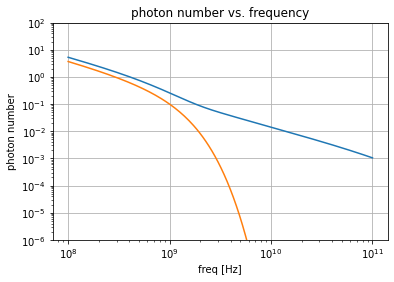

In [98]:
f = np.logspace(8, 11, 200)
plt.loglog(f, noise_out(cn.k*300, f, [(20, 4), (10, 0.1), (20, 0.02)])/(cn.h*f))
plt.loglog(f, power_T(f, 0.02)/(cn.h*f))
plt.ylim(1e-6, 1e2)
plt.xlabel('freq [Hz]')
plt.ylabel('photon number')
plt.title('photon number vs. frequency')
plt.grid('all')

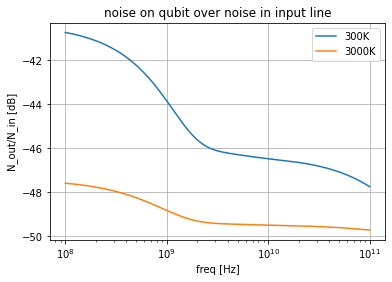

In [99]:
f = np.logspace(8, 11, 200)
noise_in = cn.k*300
plt.semilogx(f, 10*np.log10(noise_out(noise_in, f, [(20, 4), (10, 0.1), (20, 0.02)])/noise_in), label='300K')
noise_in = cn.k*3000
plt.semilogx(f, 10*np.log10(noise_out(noise_in, f, [(20, 4), (10, 0.1), (20, 0.02)])/noise_in), label='3000K')
#plt.ylim(1e-6, 1e2)
plt.grid('all')
plt.xlabel('freq [Hz]')
plt.ylabel('N_out/N_in [dB]')
plt.title('noise on qubit over noise in input line')
plt.legend()

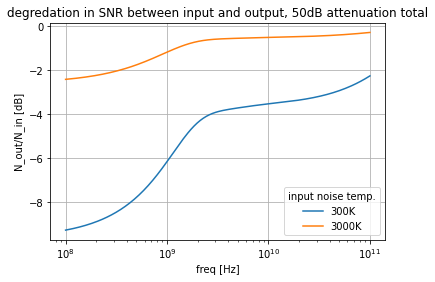

In [100]:
f = np.logspace(8, 11, 200)
noise_in = cn.k*300
plt.semilogx(f, -50 - 10*np.log10(noise_out(noise_in, f, [(20, 4), (10, 0.1), (20, 0.02)])/noise_in), label='300K')
noise_in = cn.k*3000
plt.semilogx(f, -50 - 10*np.log10(noise_out(noise_in, f, [(20, 4), (10, 0.1), (20, 0.02)])/noise_in), label='3000K')
#plt.ylim(1e-6, 1e2)
plt.grid('all')
plt.xlabel('freq [Hz]')
plt.ylabel('N_out/N_in [dB]')
plt.title('degredation in SNR between input and output, 50dB attenuation total')
plt.legend(title='input noise temp.')

We want to use eq. 6 in "microwaves in quantum computing":

$$
\frac{P_{av}}{S_{av}} = \frac{\Omega^2}{4R_{\uparrow\downarrow}}
$$

we assume that $\Omega$ = 50MHz and we want 1e-4 transitions per rotation, so we want SNR of about 10^10

We see above that at 300K the noise attenuation is about -46dB and in 3000K it's about -48dB.

And so the SNR degrades by at most 6dB.

Therefore we need an SNR of above 106dB, and more realistically taking into account margins let's say 120dB.

## number of photons for several drive powers

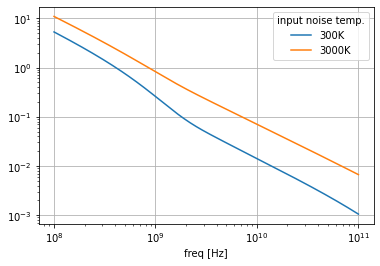

In [90]:
f = np.logspace(8, 11, 200)
noise_in = cn.k*300
plt.loglog(f, noise_out(noise_in, f, [(20, 4), (10, 0.1), (20, 0.02)])/(cn.h*f), label='300K')
noise_in = cn.k*3000
plt.loglog(f, noise_out(noise_in, f, [(20, 4), (10, 0.1), (20, 0.02)])/(cn.h*f), label='3000K')
#plt.ylim(1e-6, 1e2)
plt.grid('all')
plt.xlabel('freq [Hz]')

plt.legend(title='input noise temp.')